# **Insurance Cost Analysis**



In this project, we'll perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)|
|charges| Annual Insurance charges in USD | float|

## Objectives
In this project, we will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models.



##Import all required libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

##**Import the dataset**



In [32]:
#load the dataset into a pandas dataframe
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath)

In [33]:
#print first 10 rows of the dataframe
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


We can note that there are currently no headers in the CSV file.

Let's add the headers to the dataframe, as mentioned in the project scenario.



In [34]:
#add headers to the dataframe
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers

Now, lets replace the '?' entries with 'NaN' values.

In [35]:
#replace "?" with NaN
df.replace("?", np.nan, inplace=True)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


##**Data Wrangling**
Lets identify the columns that have some 'Null' (or NaN) information.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


We'll now handle missing data:

* For continuous attributes (e.g., age), we'll replace missing values with the mean.
* For categorical attributes (e.g., smoker), we'll replace missing values with the most frequent value.

Then update the data types of the respective columns.

In [37]:
#replace missing age values with the average age
avg_age = df['age'].astype(float).mean()
df['age'].replace(np.nan, avg_age, inplace=True)
#replace missing smoker values with the most frequent value
freq_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, freq_smoker, inplace=True)

In [38]:
#update data types of the columns
df['age'] = df['age'].astype(int)
df['smoker'] = df['smoker'].astype(int)

Lets verify the update.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


You can note that the charges column has values which are more than 2 decimal places long.

Let's update the charges column such that all values are rounded to nearest 2 decimal places.

In [40]:
#round charges column to 2 decimal places
df[['charges']] = np.round(df[['charges']],2)
#verify update
df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


##**Exploratory Data Analysis**

Let's implement the regression plot for charges with respect to bmi.

(0.0, 66902.85800000001)

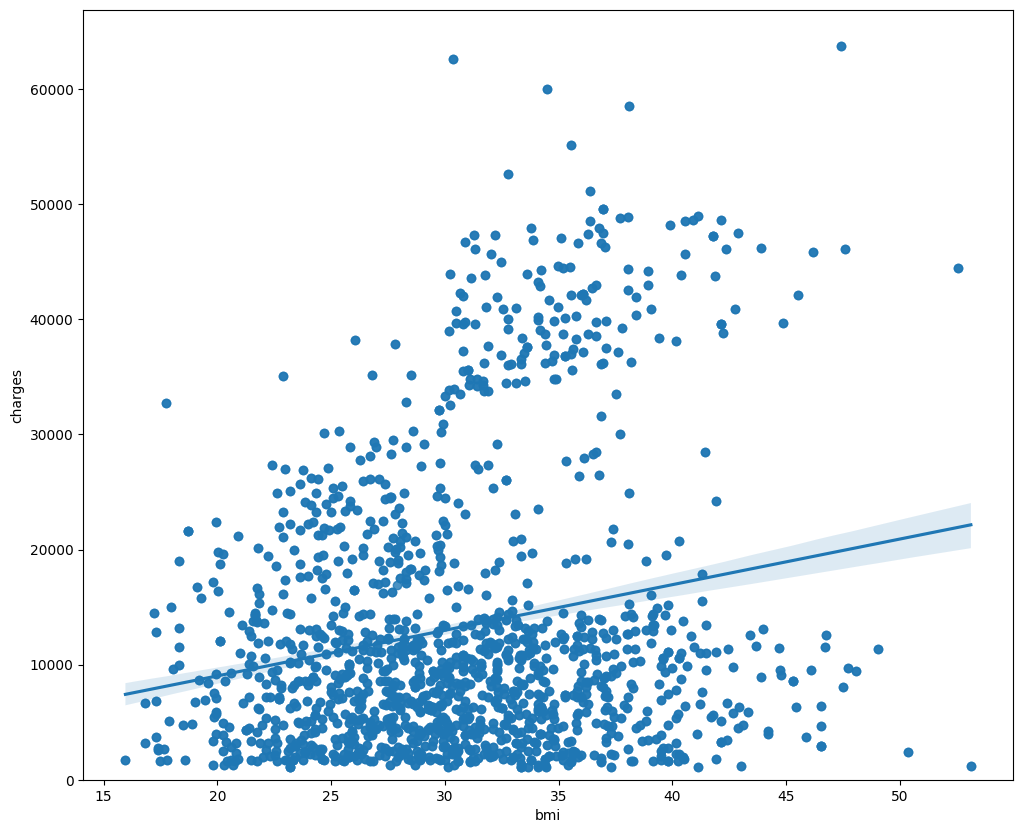

In [44]:
width = 12
height = 10
plt.figure(figsize=(width, height))

sns.regplot(x='bmi', y='charges', data=df)
plt.ylim(0,)

Let's implement the box plot for charges with respect to smoker.

<Axes: xlabel='smoker', ylabel='charges'>

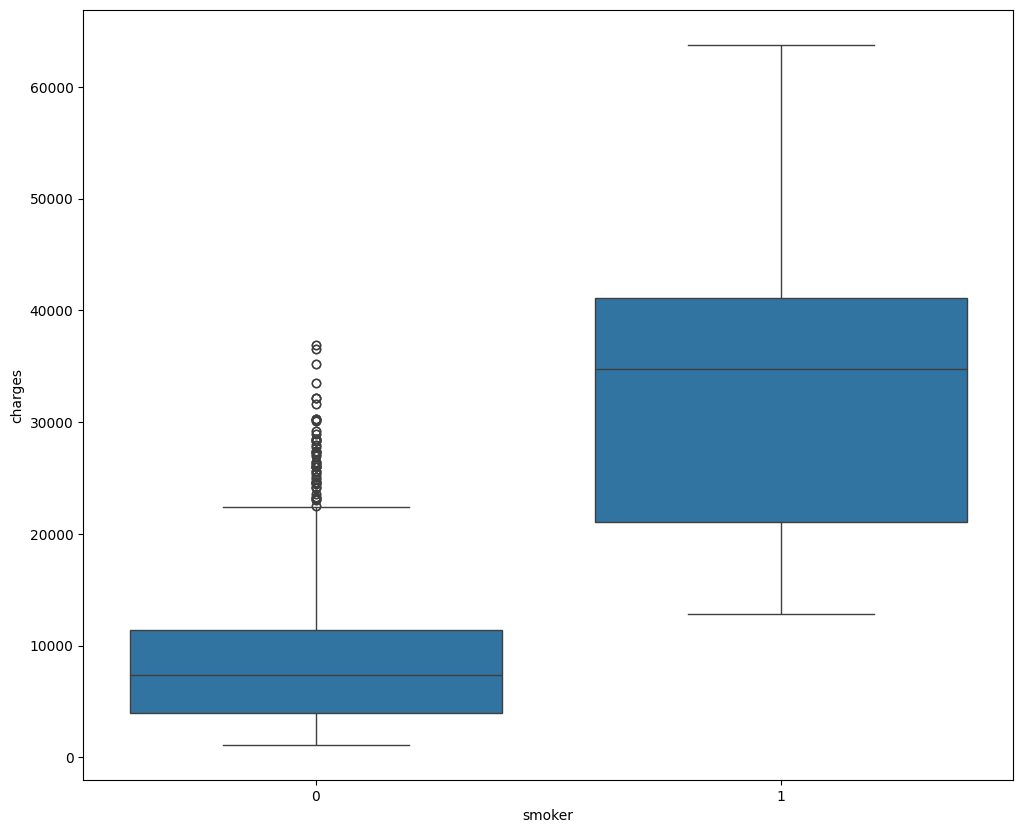

In [46]:
plt.figure(figsize=(width, height))

sns.boxplot(x= 'smoker', y= 'charges', data=df)

Let's see the correlation matrix for the dataset.

In [49]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


##**Model Development**

Now let's fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. We'll then print the $ R^2 $ score of this model.

In [51]:
#create a linear regression object
lr = LinearRegression()
#fit the model using the smoker attribute
lr.fit(df[['smoker']], df[['charges']])
#calculate R-square score for the model
print(f"R-square score: {lr.score(df[['smoker']], df[['charges']])}")

R-square score: 0.6227430402464125


Let's fit a linear regression model that may be used to predict the charges value, this time by using all other attributes of the dataset. Print the $ R^2 $
 score of this model. You should see an improvement in the performance.

In [53]:
x = df[['age','gender','bmi','no_of_children','smoker','region']]
y = df[['charges']]

#fit the model with all attributes
lr.fit(x, y)
#calculate R-square
print(f"R-square score: {lr.score(x,y)}")

R-square score: 0.7505888664568174


Let's create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset

In [58]:
#create a pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(input)

#change x to type float
x = x.astype(float)

#fit the model with all attributes
pipe.fit(x, df['charges'])
#obtain a prediction
ypipe = pipe.predict(x)

#calculate R-square
r2_ypipe = r2_score(y, ypipe)
print(f"R-square score: {r2_ypipe}")


R-square score: 0.8453719105568606


We can see that there is even further improvement in the performance.

##**Model Refinement**

Now we'll split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [60]:
x_data = df.drop('charges', axis= 1)
y_data = df['charges']
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.

In [62]:
#initialize a ridge regressor with alpha=0.1
rid_reg = Ridge(alpha=0.1)
#fit the model
rid_reg.fit(train_x, train_y)
#calculate R-square for test data
r2_test = rid_reg.score(test_x, test_y)
print(f"R-square score for test data: {r2_test}")

R-square score for test data: 0.7254198858412229


Now let's apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.

In [64]:
#create a polynomial object of degree=2
poly = PolynomialFeatures(degree=2)
#apply polynomial transformation to the training parameters
train_x_pr = poly.fit_transform(train_x)
test_x_pr = poly.fit_transform(test_x)
#fit the regression model with transformed feature
rid_reg.fit(train_x_pr, train_y)
#calculate R-square score for the testing subset
print(f"R-square score: {rid_reg.score(test_x_pr, test_y)}")

R-square score: 0.8208413195172477
